# import

In [ ]:
from fastcore.xtras import *
from fastcore.test import *
from dataclasses import dataclass
from collections import namedtuple

print("=== FastCore asdict() Examples ===\n")

# 1. Basic dataclass
@dataclass
class Person:
    name: str; age: int; city: str = "Unknown"

p = Person("Alice", 30, "NYC")
res = asdict(p)
print(f"Person: {p}")
print(f"asdict: {res}")
test_eq(res, {'name': 'Alice', 'age': 30, 'city': 'NYC'})
print()


=== FastCore asdict() Examples ===

Person: Person(name='Alice', age=30, city='NYC')
asdict: {'name': 'Alice', 'age': 30, 'city': 'NYC'}



In [ ]:
res


{'name': 'Alice', 'age': 30, 'city': 'NYC'}

In [ ]:
p

Person(name='Alice', age=30, city='NYC')

In [ ]:
p = Person("gaurav")

TypeError: Person.__init__() missing 1 required positional argument: 'age'

In [ ]:
@dataclass  
class Emp:
    name: str; age: int = Unset; dept: str = "Eng"

emp1,emp2 = Emp("Bob", 25, "Sales"), Emp("Sue")
print(f"emp1: {asdict(emp1)}")
print(f"emp2: {asdict(emp2)}")  # age excluded automatically
# test_eq(asdict(emp2), {'name': 'Sue', 'dept': 'Eng'})
print()

emp1: {'name': 'Bob', 'age': 25, 'dept': 'Sales'}
emp2: {'name': 'Sue', 'age': <enum 'Unset'>, 'dept': 'Eng'}



In [ ]:
asdict(emp2)

{'name': 'Sue', 'age': <enum 'Unset'>, 'dept': 'Eng'}

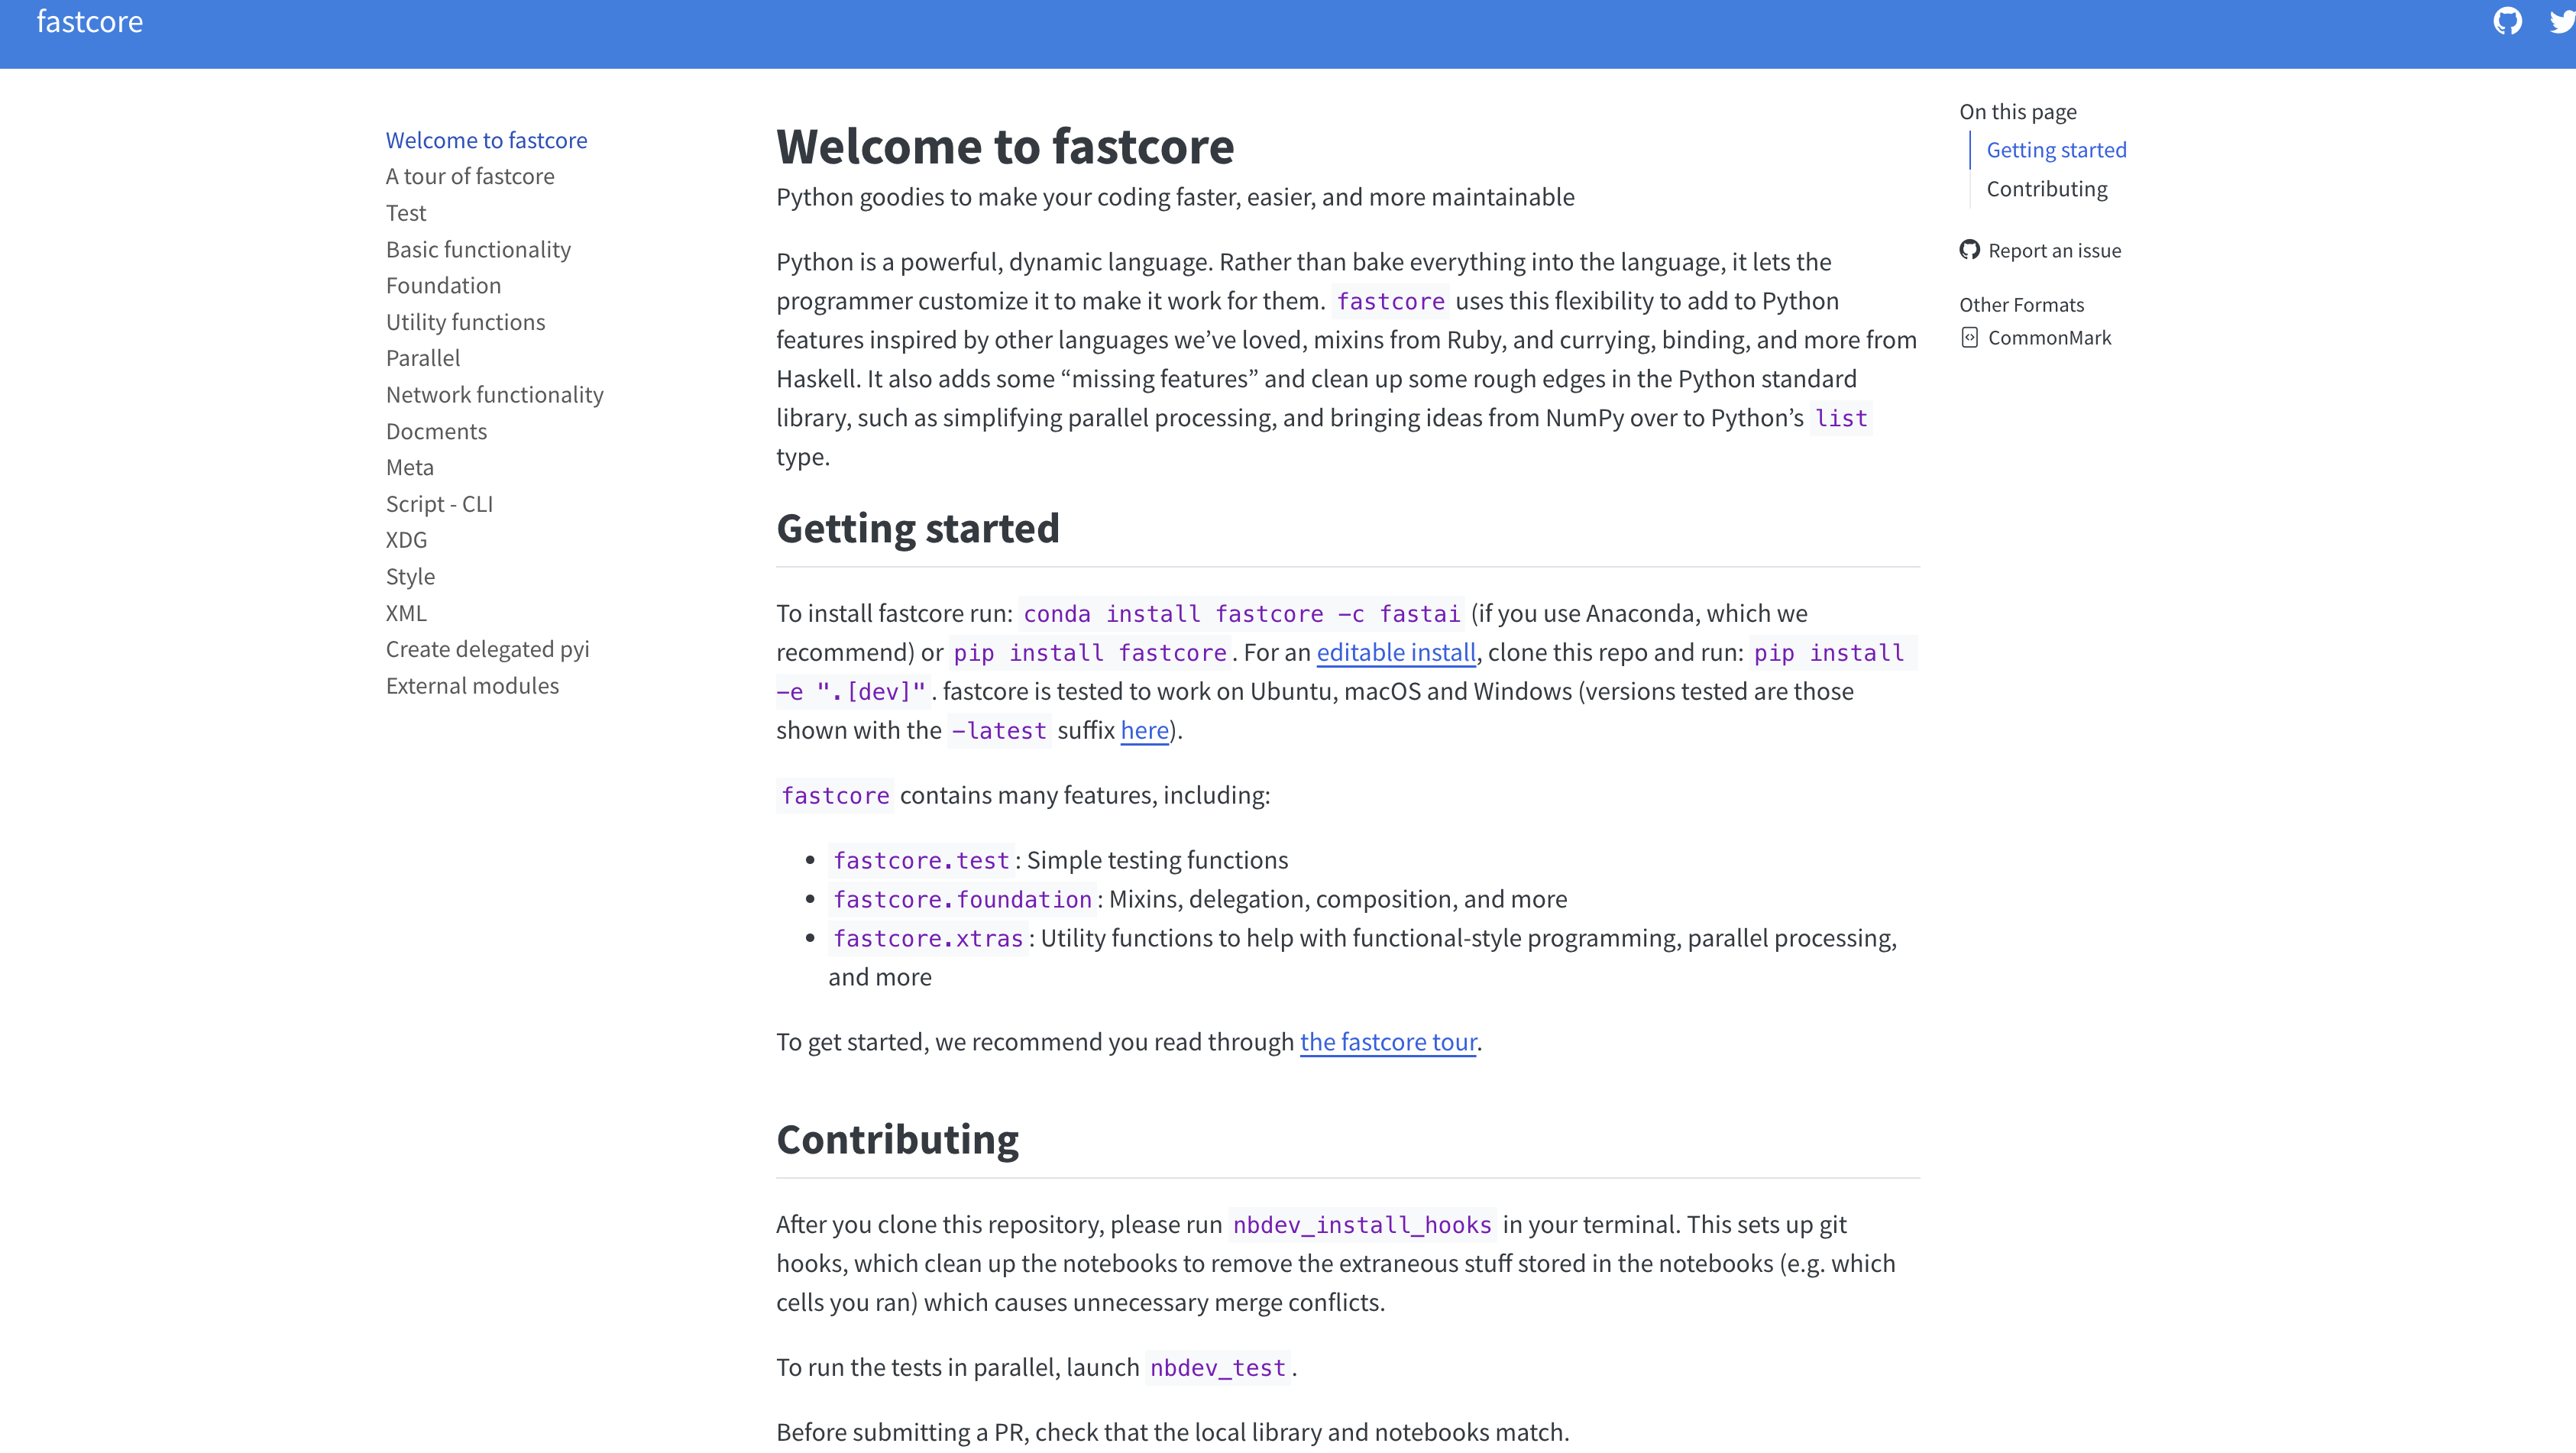

how can i get the url for for all the table of content (to the left side) what is modern way to do this

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To extract the table of contents URLs from the left sidebar, you can use web scraping with modern Python libraries. Here's a clean approach:

```python
import httpx
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
```

```python
def get_toc_urls(base_url):
    "Extract all table of contents URLs from sidebar"
    resp = httpx.get(base_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    
    # Find the sidebar/navigation element (adjust selector as needed)
    sidebar = soup.find('nav') or soup.find('div', class_='sidebar') or soup.find('ul')
    if not sidebar: return []
    
    links = sidebar.find_all('a', href=True)
    return [urljoin(base_url, link['href']) for link in links if link.get('href')]
```

For the fastcore documentation specifically, you might need to target the specific navigation structure:

```python
def get_fastcore_toc_urls():
    "Get fastcore documentation table of contents URLs"
    base_url = "https://fastcore.fast.ai/"
    resp = httpx.get(base_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    
    # Look for the specific navigation structure
    nav_links = soup.select('nav a[href], .sidebar a[href], ul li a[href]')
    return [urljoin(base_url, link['href']) for link in nav_links if link.get('href') and not link['href'].startswith('#')]
```

Try running this and let me know what structure you find in the HTML!



In [ ]:

import httpx
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse

def get_toc_urls(base_url):
    "Extract all table of contents URLs from sidebar"
    resp = httpx.get(base_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    
    # Find the sidebar/navigation element (adjust selector as needed)
    sidebar = soup.find('nav') or soup.find('div', class_='sidebar') or soup.find('ul')
    if not sidebar: return []
    
    links = sidebar.find_all('a', href=True)
    return [urljoin(base_url, link['href']) for link in links if link.get('href')]


def get_fastcore_toc_urls():
    "Get fastcore documentation table of contents URLs"
    base_url = "https://fastcore.fast.ai/"
    resp = httpx.get(base_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    
    # Look for the specific navigation structure
    nav_links = soup.select('nav a[href], .sidebar a[href], ul li a[href]')
    return [urljoin(base_url, link['href']) for link in nav_links if link.get('href') and not link['href'].startswith('#')]





help me test it

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's test it with the fastcore documentation:

```python
urls = get_fastcore_toc_urls()
print(f"Found {len(urls)} URLs:")
for url in urls[:10]: print(url)
```

If that doesn't work well, let's try the more general function:

```python
base_url = "https://fastcore.fast.ai/"
general_urls = get_toc_urls(base_url)
print(f"General method found {len(general_urls)} URLs:")
for url in general_urls[:10]: print(url)
```



In [ ]:
base_url = "https://fastcore.fast.ai/"
general_urls = get_toc_urls(base_url)
print(f"General method found {len(general_urls)} URLs:")
for url in general_urls[:10]: print(url)

General method found 3 URLs:
https://fastcore.fast.ai/index.html
https://github.com/fastai/fastcore
https://x.com/fastdotai


In [ ]:
urls = get_fastcore_toc_urls()
print(f"Found {len(urls)} URLs:")
for url in urls[:10]: print(url)

Found 23 URLs:
https://fastcore.fast.ai/index.html
https://github.com/fastai/fastcore
https://x.com/fastdotai
https://fastcore.fast.ai/index.html
https://fastcore.fast.ai/index.html
https://fastcore.fast.ai/tour.html
https://fastcore.fast.ai/test.html
https://fastcore.fast.ai/basics.html
https://fastcore.fast.ai/foundation.html
https://fastcore.fast.ai/xtras.html


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://fastcore.fast.ai/"  # or the page you want to parse
resp = requests.get(url)
soup = BeautifulSoup(resp.text, "html.parser")
toc_container = soup.select_one(".sidebar")  # adjust selector as needed
urls = [a["href"] for a in toc_container.select("a")]
print(urls)

['./index.html', './tour.html', './test.html', './basics.html', './foundation.html', './xtras.html', './parallel.html', './net.html', './docments.html', './meta.html', './script.html', './xdg.html', './style.html', './xml.html', './py2pyi.html', './external.html']


In [ ]:
L(urls)


(#16) ['./index.html','./tour.html','./test.html','./basics.html','./foundation.html','./xtras.html','./parallel.html','./net.html','./docments.html','./meta.html','./script.html','./xdg.html','./style.html','./xml.html','./py2pyi.html','./external.html']

In [ ]:
from fastcore.all import *

In [ ]:
toc_container

<nav class="sidebar collapse collapse-horizontal quarto-sidebar-collapse-item sidebar-navigation floating overflow-auto" id="quarto-sidebar">
<div class="sidebar-menu-container">
<ul class="list-unstyled mt-1">
<li class="sidebar-item">
<div class="sidebar-item-container">
<a class="sidebar-item-text sidebar-link active" href="./index.html">
<span class="menu-text">Welcome to fastcore</span></a>
</div>
</li>
<li class="sidebar-item">
<div class="sidebar-item-container">
<a class="sidebar-item-text sidebar-link" href="./tour.html">
<span class="menu-text">A tour of fastcore</span></a>
</div>
</li>
<li class="sidebar-item">
<div class="sidebar-item-container">
<a class="sidebar-item-text sidebar-link" href="./test.html">
<span class="menu-text">Test</span></a>
</div>
</li>
<li class="sidebar-item">
<div class="sidebar-item-container">
<a class="sidebar-item-text sidebar-link" href="./basics.html">
<span class="menu-text">Basic functionality</span></a>
</div>
</li>
<li class="sidebar-item

now wrap this into a small concise fucntion


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
def get_sidebar_urls(url):
    "Extract all sidebar navigation URLs from a webpage"
    resp = httpx.get(url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    sidebar = soup.select_one('.sidebar')
    if not sidebar: return []
    return [urljoin(url, a['href']) for a in sidebar.select('a[href]')]
```

Test it:

```python
get_sidebar_urls('https://fastcore.fast.ai/')
```



In [ ]:
def get_sidebar_urls(url):
    "Extract all sidebar navigation URLs from a webpage"
    resp = httpx.get(url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    sidebar = soup.select_one('.sidebar')
    if not sidebar: return []
    return [urljoin(url, a['href']) for a in sidebar.select('a[href]')]



In [ ]:
get_sidebar_urls('https://fastcore.fast.ai/')

['https://fastcore.fast.ai/index.html',
 'https://fastcore.fast.ai/tour.html',
 'https://fastcore.fast.ai/test.html',
 'https://fastcore.fast.ai/basics.html',
 'https://fastcore.fast.ai/foundation.html',
 'https://fastcore.fast.ai/xtras.html',
 'https://fastcore.fast.ai/parallel.html',
 'https://fastcore.fast.ai/net.html',
 'https://fastcore.fast.ai/docments.html',
 'https://fastcore.fast.ai/meta.html',
 'https://fastcore.fast.ai/script.html',
 'https://fastcore.fast.ai/xdg.html',
 'https://fastcore.fast.ai/style.html',
 'https://fastcore.fast.ai/xml.html',
 'https://fastcore.fast.ai/py2pyi.html',
 'https://fastcore.fast.ai/external.html']

use exmaple
```
https://r.jina.ai/https://docs.snowflake.com/en/developer-guide/snowflake-python-api/snowflake-python-overview
```
append r.jina in front of each url

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
def get_sidebar_urls_jina(url):
    "Extract sidebar URLs and prepend r.jina.ai for each"
    resp = httpx.get(url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    sidebar = soup.select_one('.sidebar')
    if not sidebar: return []
    return [f"https://r.jina.ai/{urljoin(url, a['href'])}" for a in sidebar.select('a[href]')]
```

Test it:

```python
get_sidebar_urls_jina('https://docs.snowflake.com/en/developer-guide/snowflake-python-api/snowflake-python-overview')
```



In [ ]:
def get_sidebar_urls_jina(url):
    "Extract sidebar URLs and prepend r.jina.ai for each"
    resp = httpx.get(url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    sidebar = soup.select_one('.sidebar')
    if not sidebar: return []
    return [f"https://r.jina.ai/{urljoin(url, a['href'])}" for a in sidebar.select('a[href]')]



In [ ]:
get_sidebar_urls_jina('https://fastcore.fast.ai/')


['https://r.jina.ai/https://fastcore.fast.ai/index.html',
 'https://r.jina.ai/https://fastcore.fast.ai/tour.html',
 'https://r.jina.ai/https://fastcore.fast.ai/test.html',
 'https://r.jina.ai/https://fastcore.fast.ai/basics.html',
 'https://r.jina.ai/https://fastcore.fast.ai/foundation.html',
 'https://r.jina.ai/https://fastcore.fast.ai/xtras.html',
 'https://r.jina.ai/https://fastcore.fast.ai/parallel.html',
 'https://r.jina.ai/https://fastcore.fast.ai/net.html',
 'https://r.jina.ai/https://fastcore.fast.ai/docments.html',
 'https://r.jina.ai/https://fastcore.fast.ai/meta.html',
 'https://r.jina.ai/https://fastcore.fast.ai/script.html',
 'https://r.jina.ai/https://fastcore.fast.ai/xdg.html',
 'https://r.jina.ai/https://fastcore.fast.ai/style.html',
 'https://r.jina.ai/https://fastcore.fast.ai/xml.html',
 'https://r.jina.ai/https://fastcore.fast.ai/py2pyi.html',
 'https://r.jina.ai/https://fastcore.fast.ai/external.html']

how can check each url is valid and there is inforamtion there

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
def check_urls(urls):
    "Check if URLs return valid responses"
    results = []
    for url in urls:
        try:
            resp = httpx.get(url, timeout=10)
            status = resp.status_code
            content_len = len(resp.text)
            results.append((url, status, content_len))
        except Exception as e: results.append((url, 'error', str(e)))
    return results
```

Test it:

```python
urls = get_sidebar_urls_jina('https://fastcore.fast.ai/')[:3]
check_urls(urls)
```



In [ ]:
def check_urls(urls):
    "Check if URLs return valid responses"
    results = []
    for url in urls:
        try:
            resp = httpx.get(url, timeout=10)
            status = resp.status_code
            content_len = len(resp.text)
            results.append((url, status, content_len))
        except Exception as e: results.append((url, 'error', str(e)))
    return results





In [ ]:
urls = get_sidebar_urls_jina('https://fastcore.fast.ai/')
check_urls(urls)

[('https://r.jina.ai/https://fastcore.fast.ai/index.html', 200, 2458),
 ('https://r.jina.ai/https://fastcore.fast.ai/tour.html', 200, 11889),
 ('https://r.jina.ai/https://fastcore.fast.ai/test.html', 200, 9005),
 ('https://r.jina.ai/https://fastcore.fast.ai/basics.html', 200, 82993),
 ('https://r.jina.ai/https://fastcore.fast.ai/foundation.html', 200, 27219),
 ('https://r.jina.ai/https://fastcore.fast.ai/xtras.html', 200, 41528),
 ('https://r.jina.ai/https://fastcore.fast.ai/parallel.html', 200, 7093),
 ('https://r.jina.ai/https://fastcore.fast.ai/net.html', 200, 9170),
 ('https://r.jina.ai/https://fastcore.fast.ai/docments.html', 200, 10733),
 ('https://r.jina.ai/https://fastcore.fast.ai/meta.html', 200, 22093),
 ('https://r.jina.ai/https://fastcore.fast.ai/script.html', 200, 14497),
 ('https://r.jina.ai/https://fastcore.fast.ai/xdg.html', 200, 4891),
 ('https://r.jina.ai/https://fastcore.fast.ai/style.html', 200, 3173),
 ('https://r.jina.ai/https://fastcore.fast.ai/xml.html', 200, 69

In [ ]:
import contextkit.read as rd

In [ ]:
urls[0]

'https://r.jina.ai/https://fastcore.fast.ai/index.html'

In [ ]:
rd.read_url(urls[0])

'Title: Welcome to fastcore – fastcore URL Source: https://fastcore.fast.ai/index.html Markdown Content: Python is a powerful, dynamic language. Rather than bake everything into the language, it lets the programmer customize it to make it work for them. `fastcore` uses this flexibility to add to Python features inspired by other languages we’ve loved, mixins from Ruby, and currying, binding, and more from Haskell. It also adds some “missing features” and clean up some rough edges in the Python standard library, such as simplifying parallel processing, and bringing ideas from NumPy over to Python’s `list` type. Getting started[](https://fastcore.fast.ai/index.html#getting-started) \\---------------------------------------------------------------------- To install fastcore run: `conda install fastcore -c fastai` (if you use Anaconda, which we recommend) or `pip install fastcore`. For an [editable install](https://stackoverflow.com/questions/35064426/when-would-the-e-editable-option-be-us

In [ ]:
ctx= rd.read_url(urls[0])

In [ ]:
ctx[-1000:0]

''

In [ ]:
ctx

'Title: Welcome to fastcore – fastcore URL Source: https://fastcore.fast.ai/index.html Markdown Content: Python is a powerful, dynamic language. Rather than bake everything into the language, it lets the programmer customize it to make it work for them. `fastcore` uses this flexibility to add to Python features inspired by other languages we’ve loved, mixins from Ruby, and currying, binding, and more from Haskell. It also adds some “missing features” and clean up some rough edges in the Python standard library, such as simplifying parallel processing, and bringing ideas from NumPy over to Python’s `list` type. Getting started[](https://fastcore.fast.ai/index.html#getting-started) \\---------------------------------------------------------------------- To install fastcore run: `conda install fastcore -c fastai` (if you use Anaconda, which we recommend) or `pip install fastcore`. For an [editable install](https://stackoverflow.com/questions/35064426/when-would-the-e-editable-option-be-us

In [ ]:
url[0]

'h'

In [ ]:
urls[0]

'https://r.jina.ai/https://fastcore.fast.ai/index.html'

In [ ]:
print(urls[2])
ctx= rd.read_url(urls[2])


https://r.jina.ai/https://fastcore.fast.ai/test.html


In [ ]:
ctx

'Title: Test – fastcore URL Source: https://fastcore.fast.ai/test.html Markdown Content: Simple test functions[](https://fastcore.fast.ai/test.html#simple-test-functions) \\--------------------------------------------------------------------------------- We can check that code raises an exception when that’s expected ([`test_fail`](https://fastcore.fast.ai/test.html#test_fail)). To test for equality or inequality (with different types of things) we define a simple function [`test`](https://fastcore.fast.ai/test.html#test) that compares two objects with a given `cmp` operator. * * * [source](https://github.com/AnswerDotAI/fastcore/blob/main/fastcore/test.py#L16) ### test_fail[](https://fastcore.fast.ai/test.html#test_fail) > `test_fail (f, msg=\'\', contains=\'\', args=None, kwargs=None)` _Fails with `msg` unless `f()` raises an exception and (optionally) has `contains` in `e.args`_ ``` def _fail(): raise Exception("foobar") test_fail(_fail, contains="foo") def _fail(): raise Exception(

wrap get contecxt into small fucntion

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
def get_context(url):
    "Get readable content from URL using contextkit"
    return rd.read_url(url)
```

Test it:

```python
get_context(urls[1])
```



In [ ]:
def get_context(url):
    "Get readable content from URL using contextkit"
    return rd.read_url(url)

In [ ]:
get_context(urls[1])

'Title: A tour of fastcore – fastcore URL Source: https://fastcore.fast.ai/tour.html Markdown Content: Here’s a (somewhat) quick tour of a few higlights from fastcore. ### Documentation[](https://fastcore.fast.ai/tour.html#documentation) All fast.ai projects, including this one, are built with [nbdev](https://nbdev.fast.ai/), which is a full literate programming environment built on Jupyter Notebooks. That means that every piece of documentation, including the page you’re reading now, can be accessed as interactive Jupyter notebooks. In fact, you can even grab a link directly to a notebook running interactively on Google Colab - if you want to follow along with this tour, click the link below: `colab_link(\'000_tour\')` The full docs are available at [fastcore.fast.ai](https://fastcore.fast.ai/). The code in the examples and in all fast.ai libraries follow the [fast.ai style guide](https://docs.fast.ai/dev/style.html). In order to support interactive programming, all fast.ai libraries 

run get_context for each url and append all the files into one file with heading to which url it belong i need to make context file for llm keep that in mind

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->


```python
def create_context_file(base_url, filename='context.txt'):
    "Create combined context file from all sidebar URLs"
    urls = get_sidebar_urls_jina(base_url)
    with open(filename, 'w') as f:
        for url in urls:
            f.write(f"\n\n# URL: {url}\n\n")
            try: f.write(get_context(url))
            except Exception as e: f.write(f"Error: {e}")
    return f"Created {filename} with {len(urls)} URLs"
```

Test it:

```python
create_context_file('https://fastcore.fast.ai/')
```

<details>
<summary>Thinking</summary>
The user wants to get context from each URL and create one big file with headings for each URL section. This is for creating a context file for an LLM. I need to follow the fast.ai style guide:

- No comments
- Short function definitions on one line when possible
- Loop/if/dict and function params on one line
- Concise variable names
- Use comprehensions where appropriate

I'll create a function that:
1. Gets all URLs 
2. Gets context for each URL
3. Combines them with headings
4. Returns or saves the combined content

Let me write this concisely following the style guide.
</details>




In [ ]:
def create_context_file(base_url, filename='context.txt'):
    "Create combined context file from all sidebar URLs"
    urls = get_sidebar_urls_jina(base_url)
    with open(filename, 'w') as f:
        for url in urls:
            f.write(f"\n\n# URL: {url}\n\n")
            try: f.write(get_context(url))
            except Exception as e: f.write(f"Error: {e}")
    return f"Created {filename} with {len(urls)} URLs"

In [ ]:
create_context_file('https://fastcore.fast.ai/')

'Created context.txt with 16 URLs'

In [ ]:
ls -ltr

total 100940
-rw-r--r-- 1 solveit solveit    34877 Dec 11  2019 titanic.zip
-rw-r--r-- 1 solveit solveit   698368 Feb 25  2022 us-patent-phrase-to-phrase-matching.zip
-rw-r--r-- 1 solveit solveit     1034 Dec 19 06:43 Lesson1b.py
-rw-r--r-- 1 solveit solveit      188 Dec 19 07:07 Lesson2.py
-rw-r--r-- 1 solveit solveit       45 Dec 26 08:25 lesson5.py
-rw-r--r-- 1 solveit solveit     3029 Feb 23 08:44 powerbuddy_test.html
drwxr-xr-x 2 solveit solveit       75 Mar 26 12:21 data/
drwxr-xr-x 2 solveit solveit       32 Mar 31 06:33 posts/
-rw-r--r-- 1 solveit solveit   173489 Apr  4 10:23 bird.jpg
-rw-r--r-- 1 solveit solveit   929362 Apr  4 10:23 forest.jpg
drwxr-xr-x 2 solveit solveit       10 Apr  7 10:30 models/
drwxr-xr-x 3 solveit solveit       59 Apr 14 04:34 scikit_learn_data/
-rw-r--r-- 1 solveit solveit     3258 Apr 15 13:42 gender_submission.csv
-rw-r--r-- 1 solveit solveit    28629 Apr 15 13:42 test.csv
-rw-r--r-- 1 solveit solveit    61194 Apr 15 13:42 train.csv
drwxr-xr-x 2 s

use this code to downlaod file from solve it for context.txt

```
from IPython.display import HTML

html_content = """
<a href="static/stacked_df.csv" download="stacked_df.csv" target="_blank">
    <button style="background-color: #4CAF50; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download stacked_df.csv
    </button>
</a>
"""

HTML(html_content)
```

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
from IPython.display import HTML

html_content = """
<a href="context.txt" download="context.txt" target="_blank">
    <button style="background-color: #4CAF50; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download context.txt
    </button>
</a>
"""

HTML(html_content)
```



In [ ]:
from IPython.display import HTML

html_content = """
<a href="context.txt" download="context.txt" target="_blank">
    <button style="background-color: #4CAF50; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download context.txt
    </button>
</a>
"""

HTML(html_content)


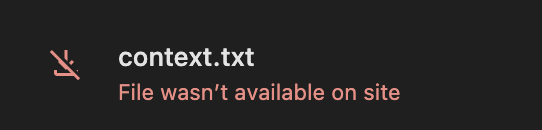

check the above errore

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The file needs to be in the `static` directory to be accessible for download. Let's move it there:

```python
import shutil
shutil.move('context.txt', 'static/context.txt')
```

Then update the download link:

```python
html_content = """
<a href="static/context.txt" download="context.txt" target="_blank">
    <button style="background-color: #4CAF50; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download context.txt
    </button>
</a>
"""

HTML(html_content)
```



In [ ]:
import shutil
shutil.move('context.txt', 'static/context.txt')

'static/context.txt'

In [ ]:
html_content = """
<a href="static/context.txt" download="context.txt" target="_blank">
    <button style="background-color: #4CAF50; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download context.txt
    </button>
</a>
"""

HTML(html_content)

is there any way to convert this context.txt into a markdown file...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
def txt_to_md(txt_file, md_file):
    "Convert text file to markdown format"
    with open(txt_file, 'r') as f: content = f.read()
    with open(md_file, 'w') as f: f.write(content)
    return f"Converted {txt_file} to {md_file}"
```

```python
txt_to_md('static/context.txt', 'static/context.md')
```

The content is already in markdown format with headings, so it just needs the `.md` extension. You can also create a download button for the markdown version:

```python
html_content = """
<a href="static/context.md" download="context.md" target="_blank">
    <button style="background-color: #2196F3; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download context.md
    </button>
</a>
"""

HTML(html_content)
```



In [ ]:
def txt_to_md(txt_file, md_file):
    "Convert text file to markdown format"
    with open(txt_file, 'r') as f: content = f.read()
    with open(md_file, 'w') as f: f.write(content)
    return f"Converted {txt_file} to {md_file}"
    

In [ ]:
txt_to_md('static/context.txt', 'static/context.md')

'Converted static/context.txt to static/context.md'

In [ ]:
html_content = """
<a href="static/context.md" download="context.md" target="_blank">
    <button style="background-color: #2196F3; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download context.md
    </button>
</a>
"""

HTML(html_content)

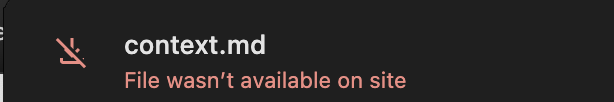


please check the above error

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's check if the file exists and list the static directory contents:

```python
import os
os.listdir('static')
```

```python
os.path.exists('static/context.md')
```

If the file exists but still shows the error, try creating a simple test to verify the web server can access it:

```python
with open('static/test.txt', 'w') as f: f.write('test file')
```

```python
html_content = """
<a href="static/test.txt" download="test.txt" target="_blank">
    <button style="background-color: #FF5722; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Test Download
    </button>
</a>
"""

HTML(html_content)
```



In [ ]:
import os
os.listdir('static')

['.sesskey', 'static', 'Lesson 1.pdf', 'context.txt', 'context.md']

In [ ]:
with open('static/test.txt', 'w') as f: f.write('test file')

In [ ]:
html_content = """
<a href="static/test.txt" download="test.txt" target="_blank">
    <button style="background-color: #FF5722; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Test Download
    </button>
</a>
"""

HTML(html_content)

look like its working

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! The files are there and the download mechanism works. Let's create both download buttons for your context files:

```python
html_content = """
<div>
<a href="static/context.txt" download="context.txt" target="_blank">
    <button style="background-color: #4CAF50; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px; margin: 5px;">
        Download context.txt
    </button>
</a>
<a href="static/context.md" download="context.md" target="_blank">
    <button style="background-color: #2196F3; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px; margin: 5px;">
        Download context.md
    </button>
</a>
</div>
"""

HTML(html_content)
```



In [ ]:
html_content = """
<div>
<a href="static/context.txt" download="context.txt" target="_blank">
    <button style="background-color: #4CAF50; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px; margin: 5px;">
        Download context.txt
    </button>
</a>
<a href="static/context.md" download="context.md" target="_blank">
    <button style="background-color: #2196F3; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px; margin: 5px;">
        Download context.md
    </button>
</a>
</div>
"""

HTML(html_content)


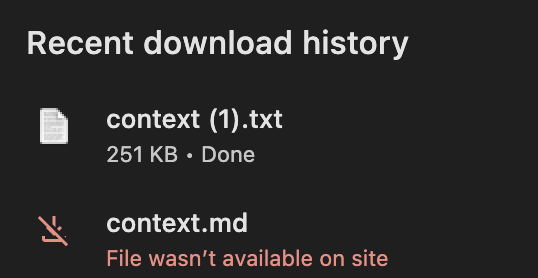

check the screenshot

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I see the txt file downloaded successfully (251 KB) but the .md file shows "File wasn't available on site". Let's check the file permissions and try recreating the .md file:

```python
import os
os.stat('static/context.md')
```

```python
os.remove('static/context.md')
txt_to_md('static/context.txt', 'static/context.md')
os.listdir('static')
```



In [ ]:
import os
os.stat('static/context.md')

os.stat_result(st_mode=33188, st_ino=1075316002, st_dev=2048, st_nlink=1, st_uid=2000, st_gid=2000, st_size=256591, st_atime=1749536182, st_mtime=1749536182, st_ctime=1749536182)

In [ ]:
os.remove('static/context.md')
txt_to_md('static/context.txt', 'static/context.md')
os.listdir('static')

['.sesskey', 'static', 'Lesson 1.pdf', 'context.txt', 'test.txt', 'context.md']

please check and tell what can i do here..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The file exists and has the right permissions. The issue might be with the web server configuration or file type. Let's try a different approach - create the markdown file with a different method:

```python
import shutil
shutil.copy('static/context.txt', 'static/fastcore_docs.md')
```

Test the new file:

```python
html_content = """
<a href="static/fastcore_docs.md" download="fastcore_docs.md" target="_blank">
    <button style="background-color: #9C27B0; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download fastcore_docs.md
    </button>
</a>
"""

HTML(html_content)
```



In [ ]:
import shutil
shutil.copy('static/context.txt', 'static/fastcore_docs.md')

'static/fastcore_docs.md'

In [ ]:
html_content = """
<a href="static/fastcore_docs.md" download="fastcore_docs.md" target="_blank">
    <button style="background-color: #9C27B0; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download fastcore_docs.md
    </button>
</a>
"""

HTML(html_content)

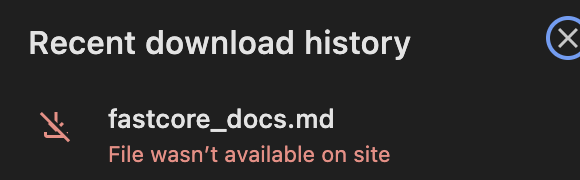

same error

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The issue seems to be with .md files specifically. Let's check if there's a web server configuration blocking .md files. Try renaming it to a different extension:

```python
shutil.copy('static/context.txt', 'static/fastcore_docs.markdown')
```

```python
html_content = """
<a href="static/fastcore_docs.markdown" download="fastcore_docs.markdown" target="_blank">
    <button style="background-color: #FF9800; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download fastcore_docs.markdown
    </button>
</a>
"""

HTML(html_content)
```

If that doesn't work, the .txt version works fine and contains the same markdown content, so you can just use that and rename it locally after download.



can we first check and open md file first..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
with open('static/context.md', 'r') as f: content = f.read()
print(f"File size: {len(content)} characters")
print("First 500 characters:")
print(content[:500])
```



In [ ]:
with open('static/context.md', 'r') as f: content = f.read()
print(f"File size: {len(content)} characters")
print("First 500 characters:")
print(content[:500])

File size: 256083 characters
First 500 characters:


# URL: https://r.jina.ai/https://fastcore.fast.ai/index.html

Title: Welcome to fastcore – fastcore URL Source: https://fastcore.fast.ai/index.html Markdown Content: Python is a powerful, dynamic language. Rather than bake everything into the language, it lets the programmer customize it to make it work for them. `fastcore` uses this flexibility to add to Python features inspired by other languages we’ve loved, mixins from Ruby, and currying, binding, and more from Haskell. It also adds some “


look like file is there..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The file exists and has content. This might be a web server configuration issue with .md files. Let's try a different approach - create it as a .txt file but with markdown content, then rename the download:

```python
html_content = """
<a href="static/context.txt" download="fastcore_context.md" target="_blank">
    <button style="background-color: #607D8B; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download as .md (renamed from .txt)
    </button>
</a>
"""

HTML(html_content)
```

This way you get the same content but the browser will download it with a .md extension.



In [ ]:
html_content = """
<a href="static/context.txt" download="fastcore_context.md" target="_blank">
    <button style="background-color: #607D8B; color: white; padding: 10px 20px; 
             border: none; cursor: pointer; font-size: 16px;">
        Download as .md (renamed from .txt)
    </button>
</a>
"""

HTML(html_content)


that worked.. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! The trick was using the `download` attribute to rename the file during download. Now you have a working solution to:

1. Extract sidebar URLs from any documentation site
2. Get content from each URL using contextkit 
3. Combine everything into a single context file
4. Download it with the correct .md extension

Your context file is ready for use with LLMs. The `download="fastcore_context.md"` attribute forces the browser to save it as a markdown file even though it's serving a .txt file.

